In [48]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

cameraman = np.array(imread('data/cameraman.jpg'))


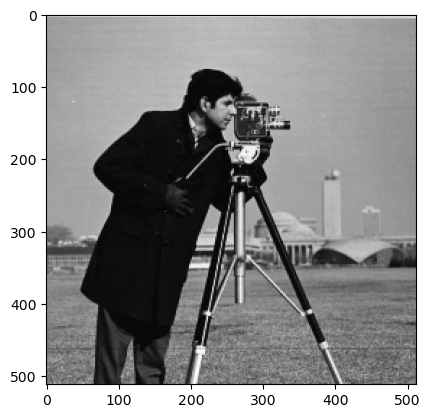

In [8]:
plt.imshow(cameraman, cmap='gray')

imsave('data/cameraman_modified.jpg',cameraman)

In [31]:
def normalize_transform(image : np.ndarray) -> np.ndarray:
    a,b = image.min(), image.max()
    image = (image - a) / (b - a)
    return image
    
def threshold_transform(image : np.ndarray, threshold : float) -> np.ndarray:
    image[ image <= threshold ] = 0
    image[ image != 0 ] = 1
    return image

def gamma_transform(image : np.ndarray, gamma : float) -> np.ndarray:
    return image ** gamma

def log_transform(image : np.ndarray) -> np.ndarray:
    return np.log2( 1 + image )


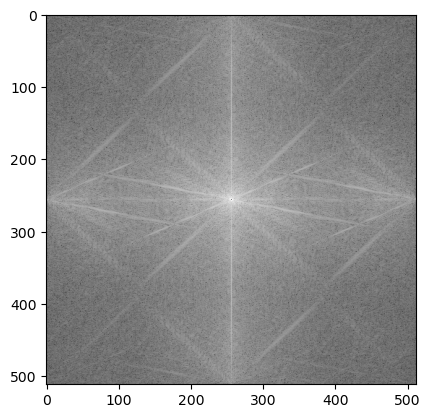

In [51]:
cameraman = np.array(imread('data/cameraman.jpg'))
#cameraman_modified = normalize_transform(cameraman)
#cameraman_modified = threshold_transform(cameraman, 50)
#cameraman_modified = gamma_transform(cameraman, 2)
fft = lambda x: fftshift(abs(fft2(x)))
cameraman_modified = fft(cameraman-cameraman.mean())
cameraman_modified = log_transform(fft(cameraman-cameraman.mean()))





plt.imshow(cameraman_modified, cmap='gray')


In [84]:

def compress_half(image : np.ndarray) -> np.ndarray:
    m,n = image.shape[0],image.shape[1]
    new_image = np.zeros((m//2,n//2))
    new_image = image[:2*m:2,:2*n:2] + image[1:2*m:2 ,:2*n:2] + image[:2*m:2 ,1:2*n:2] + image[1:2*m:2 ,1:2*n:2]
    return (new_image / 4)



[[ 73  72  73 ...  33  33  33]
 [ 77  75  74 ...  31  31  31]
 [197 195 193 ... 217 217 217]
 ...
 [114 120 129 ... 133 120 108]
 [121 123 124 ... 129 119 110]
 [113 122 130 ... 122 111 105]]


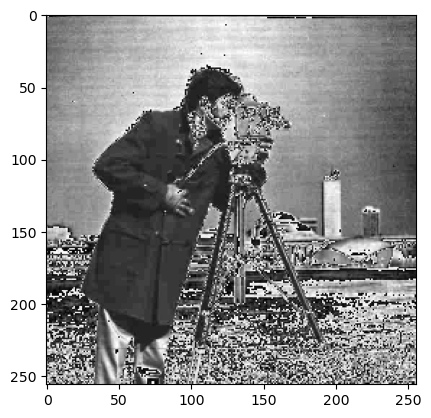

In [85]:
cameraman = np.array(imread('data/cameraman.jpg'))
cameraman_modified = compress_half(cameraman)
print(cameraman)
plt.imshow(cameraman_modified, cmap='gray')